## Stock Market price Prediction using Stacked LSTMs
Suppose we want to make money buying a stock. Since we'll want to make money buying stocking we need to predict the price of stock of the company we want to buy tomorrow. So we will create a machine learning algorithm that will show what may be the value of the stock tomorrow, depending upon which we may want to buy or short the stock to make money.

In this case, we are focusing on the stock price of the APPLE company. We will predict the price of the apple company for the next 30 days based on the value of it's stock price previous 100 days.

As we will be predicting the price of stocks based on it's history we will be using LSTMs network. LSTMs are capable long term dependencies.It is capable of handling vanishing gradient problem faced by RNNs.

All in after building the model, and predicting the price of the stock for the next 30 days, we will deploy it using streamlit.

### Method
- Download the historical data from tiingo API
- Explore the data
- Setup the dataset to predict the future historical prices
- Test a machine learning model
- Predict the price of the stock for the future 30 days.

### Data Collection

Data is collected from tingoo API using the pandas_datareader library. We will need an API to download the stock information of AAPl company. The data gotten through the API is then converted into csv format for easier calculation.

In [ ]:
!pip install pandas-datareader

In [146]:
import pandas_datareader as pdr

In [147]:
df = pdr.get_data_tiingo("AAPL",api_key = 'ba9ee346c09c22920c0e869b31a24db7f6cc1051')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [148]:
df.tail(10)

close    high       low     open  \
symbol date                                                           
AAPL   2022-10-05 00:00:00+00:00  146.40  147.38  143.0100  144.075   
       2022-10-06 00:00:00+00:00  145.43  147.54  145.2200  145.810   
       2022-10-07 00:00:00+00:00  140.09  143.10  139.4450  142.540   
       2022-10-10 00:00:00+00:00  140.42  141.89  138.5729  140.420   
       2022-10-11 00:00:00+00:00  138.98  141.35  138.2200  139.900   
       2022-10-12 00:00:00+00:00  138.34  140.36  138.1600  139.130   
       2022-10-13 00:00:00+00:00  142.99  143.59  134.3700  134.990   
       2022-10-14 00:00:00+00:00  138.38  144.52  138.1900  144.310   
       2022-10-17 00:00:00+00:00  142.41  142.90  140.2700  141.065   
       2022-10-18 00:00:00+00:00  143.75  146.70  140.6100  145.490   

                                     volume  adjClose  adjHigh    adjLow  \
symbol date                                                                
AAPL   2022-10-05 00:00:00+00:00   79470968    146.40   147.38  143.0100   
       2022-10-06 00:00:00+00:00   68402169    145.43   147.54  145.2200   
       2022-10-07 00:00:00+00:00   85925559    140.09   143.10  139.4450   
       2022-10-10 00:00:00+00:00   74899002    140.42   141.89  138.5729   
       2022-10-11 00:00:00+00:00   77033672    138.98   141.35  138.2200   
       2022-10-12 00:00:00+00:00   70433744    138.34   140.36  138.1600   
       2022-10-13 00:00:00+00:00  113223975    142.99   143.59  134.3700   
       2022-10-14 00:00:00+00:00   88597969    138.38   144.52  138.1900   
       2022-10-17 00:00:00+00:00   85250939    142.41   142.90  140.2700   
       2022-10-18 00:00:00+00:00   98702752    143.75   146.70  140.6100   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2022-10-05 00:00:00+00:00  144.075   79470968      0.0          1.0  
       2022-10-06 00:00:00+00:00  145.810   68402169      0.0          1.0  
       2022-10-07 00:00:00+00:00  142.540   85925559      0.0          1.0  
       2022-10-10 00:00:00+00:00  140.420   74899002      0.0          1.0  
       2022-10-11 00:00:00+00:00  139.900   77033672      0.0          1.0  
       2022-10-12 00:00:00+00:00  139.130   70433744      0.0          1.0  
       2022-10-13 00:00:00+00:00  134.990  113223975      0.0          1.0  
       2022-10-14 00:00:00+00:00  144.310   88597969      0.0          1.0  
       2022-10-17 00:00:00+00:00  141.065   85250939      0.0          1.0  
       2022-10-18 00:00:00+00:00  145.490   98702752      0.0          1.0

In [149]:
df.to_csv('AAPL.csv')

In [150]:
import pandas as pd

In [151]:
df = pd.read_csv('AAPL.csv')

In [152]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-20 00:00:00+00:00,156.25,157.7500,155.96,156.61,23612246,37.070835,37.426715,37.002031,37.156246,94448984,0.0,1.0
1,AAPL,2017-10-23 00:00:00+00:00,156.17,157.6900,155.50,156.89,21654461,37.051855,37.412480,36.892895,37.222677,86617844,0.0,1.0
2,AAPL,2017-10-24 00:00:00+00:00,157.10,157.4200,156.20,156.29,17137731,37.272500,37.348421,37.058972,37.080325,68550924,0.0,1.0
3,AAPL,2017-10-25 00:00:00+00:00,156.41,157.5500,155.27,156.91,20126554,37.108795,37.379264,36.838327,37.227422,80506216,0.0,1.0
4,AAPL,2017-10-26 00:00:00+00:00,157.41,157.8295,156.78,157.23,16751691,37.346049,37.445577,37.196579,37.303343,67006764,0.0,1.0


In [153]:
df1 = df.reset_index()['close']

In [154]:
df1.head()

0    156.25
1    156.17
2    157.10
3    156.41
4    157.41
Name: close, dtype: float64

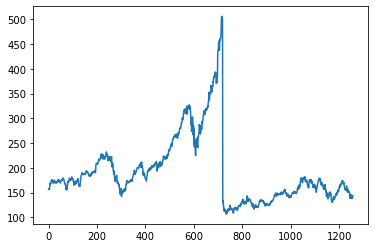

In [155]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Scaling of the Data

As the LSTMs are sensitive to the state of the input data. It is good practice to rescale the data to the range of 0-1, called as normalizing. In this case we have used MinMaxScaler() to normalise the stock prices of the data.

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply minmax scaler

In [156]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [157]:
df1

array([[0.12375704],
       [0.12355667],
       [0.12588604],
       ...,
       [0.07899812],
       [0.08909205],
       [0.09244834]])

### Test Train Split

In the case of time-series data it is not good to use cross-validation for train-test split. As in this case the sequence of values is very important. In this case we split the training data with 65% of the observations, leaving the remainder 35% for testing.

In [158]:
# splitting dataset into train and test dataset
training_size = int(len(df1)*0.65)
test_size = int (len(df1)*0.35)
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [159]:
train_data

array([[1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],
       [1.26662492e-01],
       [1.40788979e-01],
       [1.49981215e-01],
       [1.55792110e-01],
       [1.50407013e-01],
       [1.53462743e-01],
       [1.64458359e-01],
       [1.68841578e-01],
       [1.70244208e-01],
       [1.73825924e-01],
       [1.72924233e-01],
       [1.69893550e-01],
       [1.68140263e-01],
       [1.61552912e-01],
       [1.55892298e-01],
       [1.60951785e-01],
       [1.58572323e-01],
       [1.58146525e-01],
       [1.66061365e-01],
       [1.70619912e-01],
       [1.70644959e-01],
       [1.68440827e-01],
       [1.65886036e-01],
       [1.56894177e-01],
       [1.62830307e-01],
       [1.60826550e-01],
       [1.57695679e-01],
       [1.57294928e-01],
       [1.55716969e-01],
       [1.56493425e-01],
       [1.56618660e-01],
       [1.64884158e-01],
       [1.62454602e-01],
       [1.63882279e-01],
       [1.63757044e-01],
       [1.68140263e-01],


In [160]:
test_data

array([[0.07521603],
       [0.08072636],
       [0.09036944],
       [0.09097057],
       [0.0882154 ],
       [0.07576706],
       [0.06291797],
       [0.06837821],
       [0.0705072 ],
       [0.06787727],
       [0.07651847],
       [0.07494051],
       [0.07531622],
       [0.07306199],
       [0.07150908],
       [0.07085786],
       [0.07145899],
       [0.06599875],
       [0.06011271],
       [0.0572824 ],
       [0.05768316],
       [0.04798998],
       [0.04763932],
       [0.04636193],
       [0.03544145],
       [0.03611772],
       [0.05247339],
       [0.04578585],
       [0.03812148],
       [0.03328741],
       [0.03651847],
       [0.02384471],
       [0.0356794 ],
       [0.03291171],
       [0.03787101],
       [0.03554164],
       [0.04295554],
       [0.04691296],
       [0.04488416],
       [0.03428929],
       [0.03293676],
       [0.04145272],
       [0.03932373],
       [0.03318723],
       [0.03443957],
       [0.03599249],
       [0.03644333],
       [0.032

This function is explicitly created to choose the number of timesteps to use as input variables to predict the next time periood- the default value is set to 1.

In [161]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [166]:
# reshape into X=t,t+1,t+2,t+3 and y=t+4
X_train,y_train = create_dataset(train_data,100)

In [167]:
X_test,y_test = create_dataset(test_data,100)

In [168]:
# reshape input to the [samples,time_steps,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
!pip install tensorFlow

In [165]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Nest step is designing and fitting the LSTM network for this problem.
The network has 2 layers, with 50 LSTM blocks, and as the return_sequenes is set to True the output then passed to new layer.The default sigmoid function is used for the LSTm blocks. The network is trained for 120 epochs and a batch size of 64 is used.

In [169]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [170]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [171]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64,verbose=1)

Epoch 1/120
12/12 [==============================] - 19s 376ms/step - loss: 0.0348 - val_loss: 4.8174e-04
Epoch 2/120
12/12 [==============================] - 3s 237ms/step - loss: 0.0160 - val_loss: 0.0050
Epoch 3/120
12/12 [==============================] - 3s 239ms/step - loss: 0.0113 - val_loss: 8.4175e-04
Epoch 4/120
12/12 [==============================] - 3s 226ms/step - loss: 0.0096 - val_loss: 4.3509e-04
Epoch 5/120
12/12 [==============================] - 3s 225ms/step - loss: 0.0092 - val_loss: 5.8259e-04
Epoch 6/120
12/12 [==============================] - 3s 223ms/step - loss: 0.0078 - val_loss: 0.0010
Epoch 7/120
12/12 [==============================] - 3s 217ms/step - loss: 0.0070 - val_loss: 5.2480e-04
Epoch 8/120
12/12 [==============================] - 3s 213ms/step - loss: 0.0063 - val_loss: 2.9643e-04
Epoch 9/120
12/12 [==============================] - 3s 219ms/step - loss: 0.0069 - val_loss: 8.3921e-04
Epoch 10/120
12/12 [==============================] - 3s 220ms

In [173]:
model.save('keras_model.h5')

Once the model is fit, we can estimate the performance of the model on the train and test dataset. This will give us a point of comparision for the new models.



In [175]:
## prediction and check the performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


11/11 [==============================] - 1s 47ms/step


In [176]:
# Transformback to the original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Error Calculation

We see there is not much difference between the RMSE for test and train dataset so, our model is pretty accurate.

In [177]:
#Calculate RMSE performance metric
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

236.5627194946898

In [178]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

155.21949587028578

### Plotting the Data

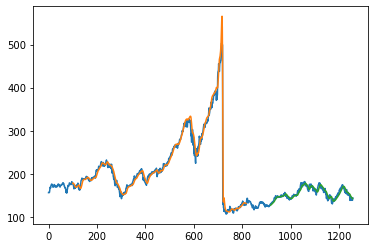

In [179]:
# Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] =test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [180]:
import tensorflow as tf

In [181]:
len(test_data)

440

In [182]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [183]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [184]:
temp_input

[0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731

### Prediction for next 30 days.

In [185]:
#demonstrate prediction for next 30 days
from numpy import array
lst_output = []
n_steps=100
i=0
while i<30:
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        #print (x_input)
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.08760913]
101
1 day input [0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08

In [186]:
len(df1)

1257

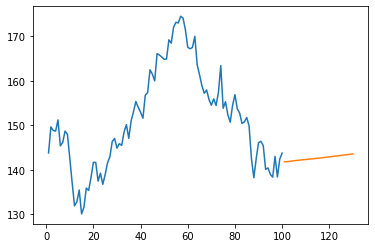

In [187]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [188]:
day_new.shape

(100,)

In [189]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [190]:
df1.shape

(1257, 1)

In [191]:
len(df1)

1257

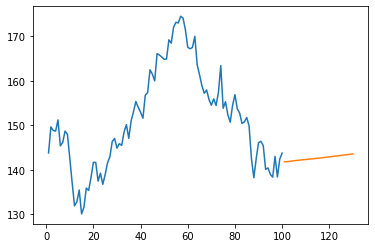

In [192]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

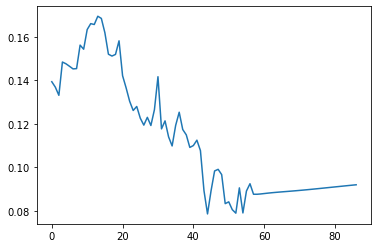

In [193]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
!pip install streamlit